In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
reviews = pd.read_csv('amazon_reviews.csv')
reviews.head(50)

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.000000
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.000000
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.000000
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.000000
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.000000
5,5,2Cents!,5.0,It's mini storage. It doesn't do anything els...,2013-04-29,588,0,0,0,0,0.0,0.000000
6,6,2K1Toaster,5.0,I have it in my phone and it never skips a bea...,2013-10-19,415,0,0,0,0,0.0,0.000000
7,7,"35-year Technology Consumer ""8-tracks to 802.11""",5.0,It's hard to believe how affordable digital ha...,2014-10-07,62,0,0,0,0,0.0,0.000000
8,8,4evryoung,5.0,Works in a HTC Rezound. Was running short of ...,2014-03-24,259,1,0,1,1,1.0,0.206549
9,9,53rdcard,5.0,"in my galaxy s4, super fast card, and am total...",2013-11-10,393,0,0,0,0,0.0,0.000000


In [ ]:
# Sentiment analysis
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

reviews['sentiment'] = reviews['reviewText'].apply(get_sentiment)

TypeError: ignored

In [ ]:
# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment of each review in the 'Review' column
sentiment_scores = []
for index, row in reviews.iterrows():
    text = row['Review']
    score = sid.polarity_scores(text)
    #print(f'Review: {text}\nSentiment score: {score}\n')
    sentiment_scores.append(score['compound'])

KeyError: ignored

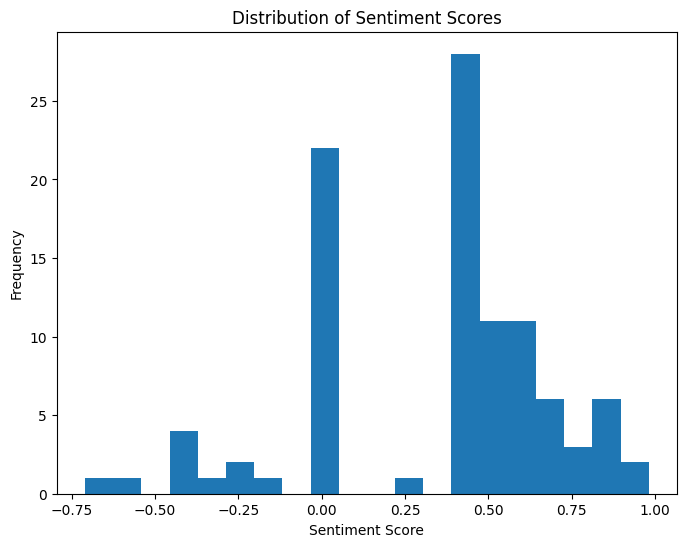

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(sentiment_scores, bins=20)
ax.set_xlabel('Sentiment Score')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Sentiment Scores')
plt.show()

In [ ]:
# Topic modelling
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(reviews['Review'])
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

def get_topics(model, feature_names, n_top_words):
    topics = []
    for idx, topic in enumerate(model.components_):
        words = ' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        topics.append(words)
    return topics

topics = get_topics(lda, vectorizer.get_feature_names_out(), 10)

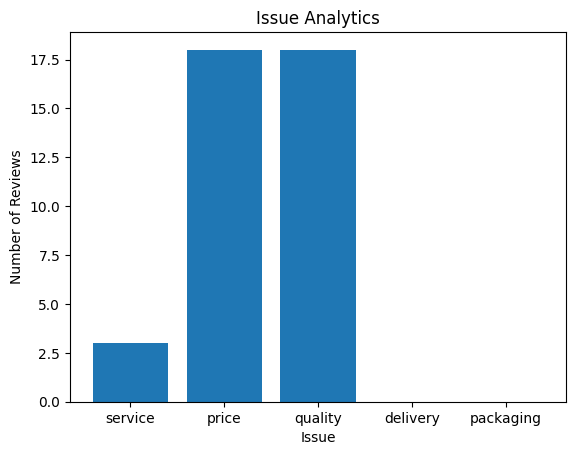

In [ ]:
# Issue analytics
issues = ['service', 'price', 'quality', 'delivery', 'packaging']
for issue in issues:
    reviews[issue] = reviews['Review'].str.contains(issue, case=False)

issue_counts = []
for issue in issues:
    count = reviews[issue].sum()
    issue_counts.append(count)

plt.bar(issues, issue_counts)
plt.title('Issue Analytics')
plt.xlabel('Issue')
plt.ylabel('Number of Reviews')
plt.show()

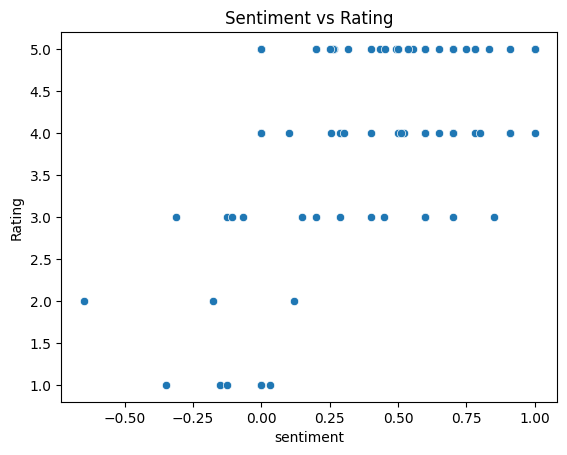

In [ ]:
# Scatter plot of sentiment and rating
sns.scatterplot(x=reviews['sentiment'], y=reviews['Rating'])
plt.title('Sentiment vs Rating')
plt.show()

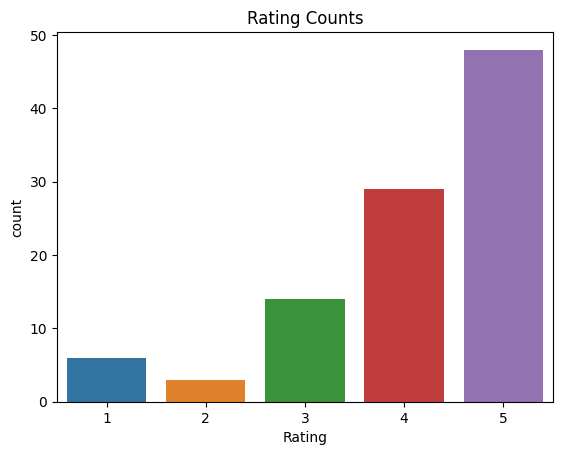

In [ ]:
sns.countplot(x='Rating', data=reviews)
plt.title('Rating Counts')
plt.show()

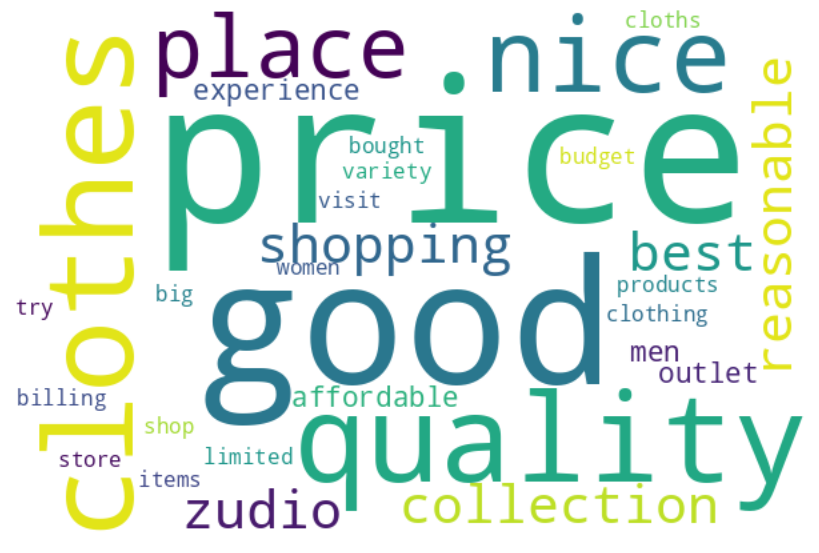

In [ ]:
# Word cloud of topics
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(' '.join(topics))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import pandas as pd
from textblob import TextBlob

# Define the function to perform sentiment analysis
def sentiment_analysis(text):
    # Analyze the sentiment of the text using TextBlob
    sentiment = TextBlob(text).sentiment.polarity
    
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Load the dataset
df = pd.read_csv('reviews.csv')

# Apply sentiment analysis to the 'Review' column and create a new column for the result
df['Sentiment'] = df['Review'].apply(sentiment_analysis)

# Display the results
df


,Rating,Review,Sentiment
0,5,Good place\r,Positive
1,5,Best clothes for kids and younger quality A1...,Positive
2,5,Really good n well maintain affordable price,Positive
3,4,Very good,Positive
4,5,Best ever service and price also resonable tr...,Positive
...,...,...,...
95,1,Hopeless... Standing since last 1/2 an hour fo...,Neutral
96,4,Very good,Positive
97,5,Nice collection at an economic price.,Positive
98,5,"Branded, budget friendly, good quality clothes",Positive


In [ ]:
# Filter the dataframe to show only negative sentiment reviews
negative_reviews = df[df['Sentiment'] == 'Negative']

# Display the negative reviews
negative_reviews


,Rating,Review,Sentiment
6,1,"No good collection in clothes i found , no qua...",Negative
24,2,Collection didn't met expectations.. Also thei...,Negative
57,2,My brother buy 2 t shirt from this shop very ...,Negative
66,3,Frankly didnt like the quality of the clothes....,Negative
74,3,Girls'product not available Properly as compar...,Negative
78,1,Not worth,Negative
84,1,Not That expected!,Negative
89,3,Visited Zudio at Ghansoli on Sunday. You can p...,Negative
93,3,Expensive pricing compared to other stores. Wi...,Negative


In [ ]:
# Get the most common negative comment and store it in an array
if not negative_reviews.empty:
    most_common_negative_comment = negative_reviews['Review'].mode()[0]
    negative_comments = [most_common_negative_comment]
    # print('Most common negative comment:', most_common_negative_comment)
else:
    negative_comments = []
    print('No negative sentiment reviews in the dataset')

print('Negative comments array:')
negative_comments

Negative comments array:


["Collection didn't met expectations.. Also their AC was switched off, so it was very suffocating to shop inside the store.."]

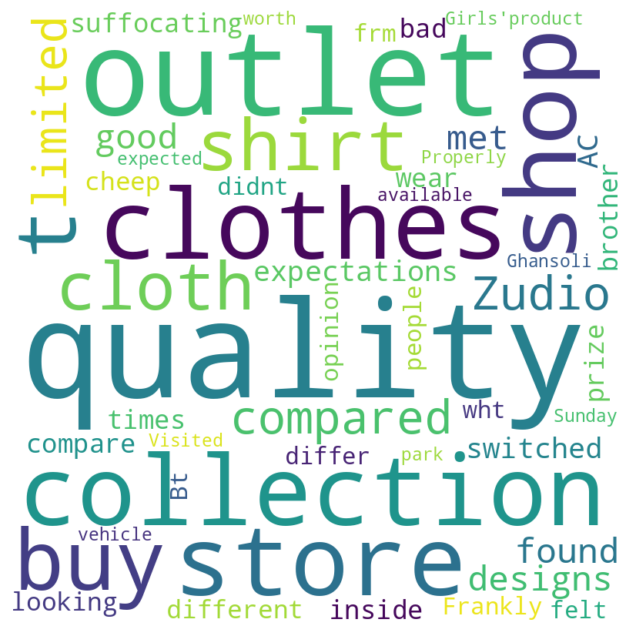

In [ ]:
# Join all negative comments into a single string
negative_text = ' '.join(negative_reviews['Review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50).generate(negative_text)

# Plot the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()